In [40]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [41]:
df = pd.read_csv("datasets/nasd_input.csv", header=None, sep='\t')
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (100, 731)


,0,1,2,3,4,5,6,7,8,9,...,721,722,723,724,725,726,727,728,729,730
0,a,40.130,40.617,40.120,39.890,40.130,40.081,40.120,39.701,39.431,...,67.490,68.030,68.020,68.130,68.370,68.220,68.250,68.110,67.47,66.81
1,aa,34.711,34.283,34.260,34.349,34.453,34.453,34.518,34.388,34.584,...,47.420,47.780,47.700,47.460,47.120,47.290,46.970,45.890,43.33,43.01
2,aaba,50.880,51.150,50.020,50.650,50.860,50.530,51.220,50.510,50.170,...,68.860,70.120,70.590,70.510,70.230,71.710,72.220,71.160,70.19,70.56
3,aac,29.500,29.600,29.500,29.350,29.760,29.890,30.960,30.920,30.210,...,8.200,7.920,7.550,10.020,10.080,11.140,11.070,11.110,10.88,11.28
4,aal,49.295,49.422,48.811,49.997,50.512,51.377,51.932,52.135,52.408,...,47.147,46.718,47.735,47.257,47.346,47.406,46.358,46.269,45.67,45.82


In [42]:
training_set = df.iloc[0, 1:300].values.reshape(-1, 1)
test_set = df.iloc[0, 300:].values.reshape(-1, 1)

# print(training_set)

In [43]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 299):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# print(X_train.shape)

In [44]:
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True,
          input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 81ms/step - loss: 0.1941
Epoch 2/10
8/8 [==============================] - 1s 90ms/step - loss: 0.0583
Epoch 3/10
8/8 [==============================] - 1s 84ms/step - loss: 0.0418
Epoch 4/10
8/8 [==============================] - 1s 82ms/step - loss: 0.0371
Epoch 5/10
8/8 [==============================] - 1s 97ms/step - loss: 0.0378
Epoch 6/10
8/8 [==============================] - 1s 78ms/step - loss: 0.0272
Epoch 7/10
8/8 [==============================] - 1s 79ms/step - loss: 0.0290
Epoch 8/10
8/8 [==============================] - 1s 81ms/step - loss: 0.0260
Epoch 9/10
8/8 [==============================] - 1s 99ms/step - loss: 0.0289
Epoch 10/10
8/8 [==============================] - 1s 117ms/step - loss: 0.0268


In [45]:
# Getting the predicted stock price
dataset_train = df.iloc[0, 1:300]
dataset_test = df.iloc[0, 300:]
dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []

print(inputs.shape)

for i in range(60, 491):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(491, 1)
(431, 60, 1)


In [46]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

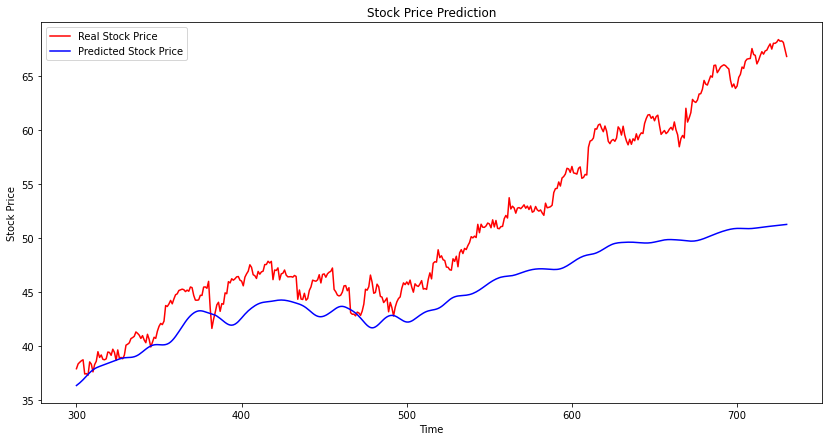

In [66]:
my_array = np.array([x for x in range(731)])
df2 = pd.DataFrame(my_array)

# Visualising the results
plt.figure(figsize=(14, 7))
plt.plot(df2.iloc[300:].values, dataset_test.values,
         color='red', label='Real Stock Price')
plt.plot(df2.iloc[300:].values, predicted_stock_price,
         color='blue', label='Predicted Stock Price')
# plt.xticks(np.arange(0, 459, 50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()